In [159]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [160]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Removing 'PassengerId' and 'Name' from the Dataset:

In [161]:
df=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Survived']]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Converting Object Type data into Categorical Data:

In [163]:
df.Sex=df.Sex.astype('category')
df.Cabin=df.Cabin.astype('category')
df.Embarked=df.Embarked.astype('category')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    category
 2   Age       714 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Cabin     204 non-null    category
 7   Embarked  889 non-null    category
 8   Survived  891 non-null    int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 50.8 KB


Categorical Encoding:

In [165]:
df.Sex=df["Sex"].cat.codes
df.Cabin=df["Cabin"].cat.codes
df.Embarked=df["Embarked"].cat.codes

In [166]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,1,22.0,1,0,7.2500,-1,2,0
1,1,0,38.0,1,0,71.2833,81,0,1
2,3,0,26.0,0,0,7.9250,-1,2,1
3,1,0,35.0,1,0,53.1000,55,2,1
4,3,1,35.0,0,0,8.0500,-1,2,0


Find Mean of the Age:

In [167]:
age=df[['Age']]
age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [168]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [169]:
age.dropna()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [170]:
mean=age.mean()
print(mean)

Age    29.699118
dtype: float64


Filling NaN values in Age with the Mean Age :

In [171]:
df['Age'].fillna(29.699118,inplace=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int16  
 7   Embarked  891 non-null    int8   
 8   Survived  891 non-null    int64  
dtypes: float64(2), int16(1), int64(4), int8(2)
memory usage: 45.4 KB


<AxesSubplot:>

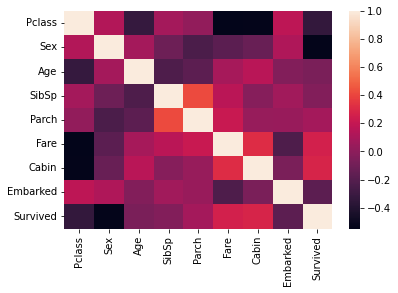

In [173]:
sns.heatmap(df.corr())

Splitting The Dataframe:

In [174]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [175]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [176]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500     -1         2
1         1    0  38.000000      1      0  71.2833     81         0
2         3    0  26.000000      0      0   7.9250     -1         2
3         1    0  35.000000      1      0  53.1000     55         2
4         3    1  35.000000      0      0   8.0500     -1         2
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000     -1         2
887       1    0  19.000000      0      0  30.0000     30         2
888       3    0  29.699118      1      2  23.4500     -1         2
889       1    1  26.000000      0      0  30.0000     60         0
890       3    1  32.000000      0      0   7.7500     -1         1

[891 rows x 8 columns]


Standardizing the X values using Standard Scaler:

In [177]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(x)

Grid Search to find Best Parameters for KNN:

In [178]:
n_neighbors=range(1,51)
weight=['uniform','distance']
metric=['euclidean','manhattan','minkowski']
grid=dict(n_neighbors=n_neighbors,weights=weight,metric=metric)
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_result=grid_search.fit(scaled_X,y)

In [179]:
print(grid_result.best_score_,grid_result.best_params_)

0.8237963718536186 {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}


Building the Final Model:

In [180]:
finalmodel=KNeighborsClassifier(n_neighbors=14,metric='manhattan',weights='uniform')
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
scores=cross_val_score(finalmodel,scaled_X,y,scoring="accuracy",cv=cv,n_jobs=-1)
print('Mean Accuracy',scores.mean())

Mean Accuracy 0.8237963718536186


Pre-processing the test data :

In [198]:
predict_df=pd.read_csv('test.csv')
predict_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [199]:
predict_df=predict_df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [200]:
predict_df.Sex=predict_df.Sex.astype('category')
predict_df.Cabin=predict_df.Cabin.astype('category')
predict_df.Embarked=predict_df.Embarked.astype('category')

In [201]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    category
 3   Age          332 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    float64 
 7   Cabin        91 non-null     category
 8   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 23.8 KB


In [202]:
age=predict_df[['Age']]
fare=predict_df[['Fare']]
age.dropna()
fare.dropna()
mean=age.mean()
fare_mean=fare.mean()
print(mean,fare_mean)

Age    30.27259
dtype: float64 Fare    35.627188
dtype: float64


In [203]:
predict_df['Age'].fillna(30.27259,inplace=True)
predict_df['Fare'].fillna(35.627188,inplace=True)

In [204]:
predict_df.Sex=predict_df["Sex"].cat.codes
predict_df.Cabin=predict_df["Cabin"].cat.codes
predict_df.Embarked=predict_df["Embarked"].cat.codes

In [205]:
predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,-1,1
1,893,3,0,47.0,1,0,7.0000,-1,2
2,894,2,1,62.0,0,0,9.6875,-1,1
3,895,3,1,27.0,0,0,8.6625,-1,2
4,896,3,0,22.0,1,1,12.2875,-1,2


In [206]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int8   
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    int8   
 8   Embarked     418 non-null    int8   
dtypes: float64(2), int64(4), int8(3)
memory usage: 20.9 KB


In [207]:
model=finalmodel.fit(scaled_X,y)

Prediction:

In [210]:
test_X=predict_df.iloc[:,1:9]
X_test=scaler.fit_transform(test_X)

In [211]:
Y_pred=finalmodel.predict(X_test)

In [212]:
print(Y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [213]:
final_df=pd.DataFrame(Y_pred,columns=['Survived'])

finaldf=pd.concat([predict_df.PassengerId,final_df],axis=1)

In [214]:
finaldf.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Saving The CSV file:

In [215]:
finaldf.to_csv('submission.csv',index=False)